In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [17]:
import tensorflow as tf
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from selenium.common.exceptions import TimeoutException

In [4]:
service = Service("C:\\Users\\paulo.bernardo\\OneDrive - Iteris Consultoria e Software\\Documentos\\Python Scripts\\chromedriver.exe")

options = webdriver.ChromeOptions()
#options.add_argument("headless")

browser = webdriver.Chrome(service=service, chrome_options=options)
browser.implicitly_wait(10)
browser.maximize_window()
browser.get("https://www.linkedin.com/jobs/search/?currentJobId=2746689900&geoId=91000000&keywords=Data%20Analyst&location=Uni%C3%A3o%20Europeia")

#elements = browser.find_elements(by=By.XPATH, value="/html/body/div[1]/div/main/section[2]/ul/li")


<ipython-input-4-e5c176663707>:6: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(service=service, chrome_options=options)


In [5]:
xPath = f"/html/body/div[1]/div/main/section[2]/ul/li[10]"
element = browser.find_element(by=By.XPATH, value=xPath)
element.click()

In [19]:
text = []

for i in range(1, 15):
    print(i)
    try:
        xPath = f"/html/body/div[1]/div/main/section[2]/ul/li[{i}]"
        element = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, xPath)))
        element.click()

        time.sleep(1)
        showMore = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div[1]/div/section/div[2]/div/section[1]/div/div/section/button[1]")))
        showMore.click()

        jobDescription = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, "/html/body/div[1]/div/section/div[2]")))
        text.append(jobDescription.text)
    except TimeoutException:
        print("Timed out waiting for page to load")

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [20]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulo.bernardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [35]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [23]:
df =  pd.DataFrame(text, columns =["text"])

In [39]:
# Apply the function to the dataframe
df['textClean'] = df['text'].apply(preprocess)

stagiair
data
analyst
group
brussel
louisa
brussels
region
belgium
weeks
applicants
group
hired
role
apply
company
website
save
stagiair
data
analyst
bied
ondersteuning
ontwikkeling
reportings
data
visualisatie
klantendata
groep
brussel
draait
team
krijgt
verschillende
ondersteunende
taken
lopende
projecten
afhankelijk
kennis
snel
taken
aanleert
takenpakket
uitgebreid
worden
taken
analyseren
klantendata
analyseren
requirements
interne
klanten
directie
sales
opstellen
reportings
excel
ontwikkelen
dashboards
klantendata
power
verrijken
opkuisen
klantendata
kwaliteit
data
optimaliseren
deelnemen
project
management
change
management
profiel
stage
onderdeel
opleiding
statistiek
business
analytics
gelijkaardig
hebt
grote
interesse
data
hier
veel
bijleren
hebt
zeer
goed
kennis
frans
kennis
nederlands
hebt
zeer
goede
kennis
nederlands
goede
kennis
frans
hebt
goede
kennis
excel
kennis
power
pluspunt
bent
analytisch
sterk
werkt
vlot
samen
hebt
voor
initiatief
bent
leergierig
aanbod
contracttype


In [109]:
tecnicalSkills = ["power bi", "tableau", "etl", "extract", "load", "transform", "transformation", \
"star-schema", "star schema", "dimension", "modeling", "dimensional modeling", "sql", "azure", "aws", "google", "python", "r", "scala"\
"business", "knowledge", "pyspark", "spark", "databricks", "synpase", "statistics", "cloud technologies", "cloud", "programming languages"]

In [91]:
def joinText(row):
    count = 0
    words = []
    for item in row:
        if item == "data":
            dataText = item + " " + row[count+1]
            words.append(dataText)    
        else:
            words.append(item.strip())
        count = count + 1
    return words

In [96]:
def tecnicalSkillsFunction(row):
    count = 0
    skills = []
    for item in row:
        if item == "data":
            dataText = item + " " + row[count+1]
            skills.append(dataText)
        else:
            if item.lower() in tecnicalSkills:
                skills.append(item)
        count = count + 1
    return skills

In [92]:
listJoinTexts = df['textClean'].apply(lambda x: joinText(x))


In [110]:
skills = df['textClean'].apply(lambda x: tecnicalSkillsFunction(x))

In [80]:
df['clean_joined'] = listJoinTexts.apply(lambda row: " ".join(row))

In [111]:
dfSkills = pd.DataFrame(skills, columns=["Skills"])

In [112]:
dfSkills['clean_skills'] = skills.apply(lambda row: " ".join(row))

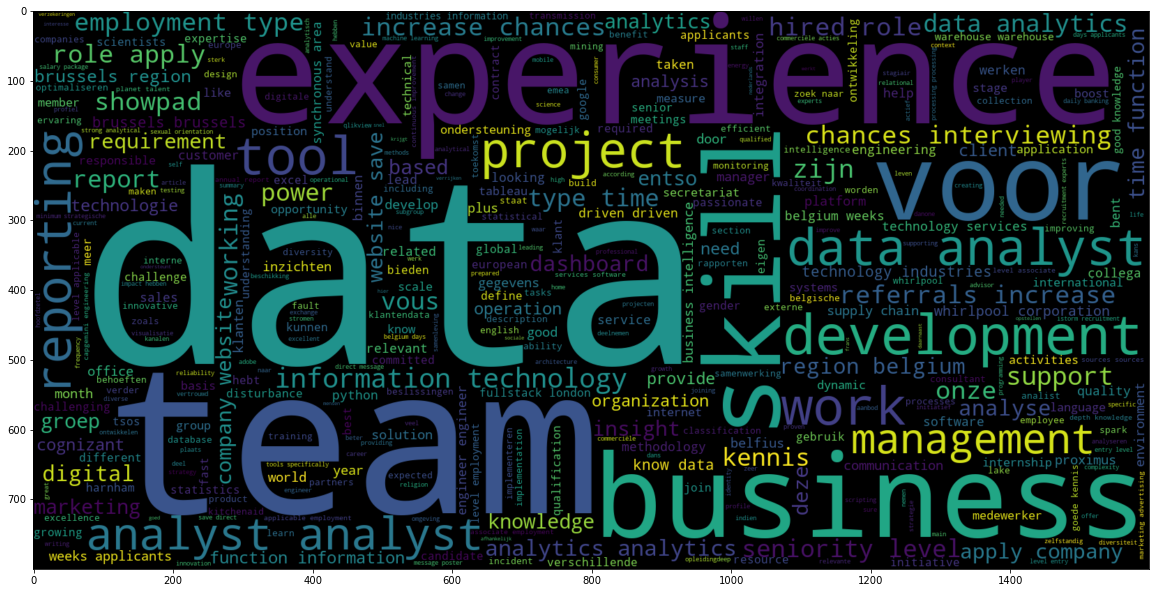

In [82]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 400 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df.clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

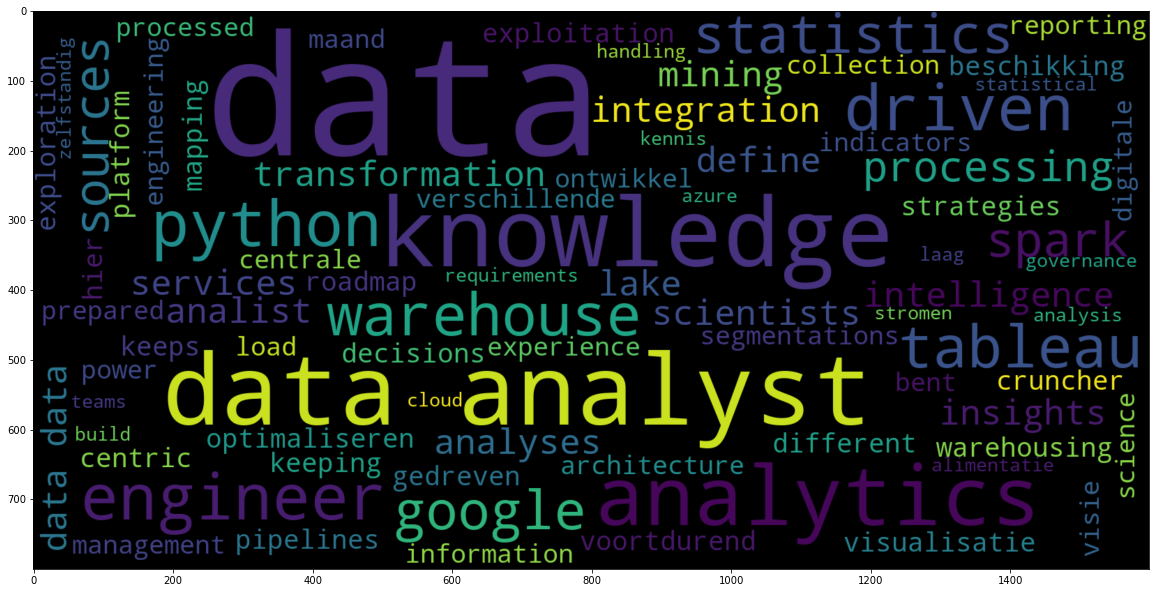

In [115]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 400 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(dfSkills.clean_skills))
plt.imshow(wc, interpolation = 'bilinear')